# **Stock Price Prediction using LSTM (Long Short-Term Memory)**

# 1. Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In this section, we import the necessary libraries. We use:

NumPy for numerical operations.
Pandas for data manipulation.
MinMaxScaler from sklearn to normalize the stock prices.
Matplotlib for visualizations.
PyTorch to build and train the LSTM model.

# 2. Loading and Preprocessing the Dataset

In [3]:
df = pd.read_csv("netflix.csv")
closed_prices = df["Close"]

Here, we load the Netflix stock price dataset and extract the Close prices, which will be our target variable for prediction.

# 3. Data Normalization

In [4]:
seq_len = 15

mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

We use a sliding window approach to create sequences of prices. Each sequence will have a length of 15. We then normalize the data using MinMaxScaler to scale the data between 0 and 1. This is crucial for training deep learning models like LSTMs.

# 4. Creating Sequences for Training and Testing

In [5]:
X = []
y = []

for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i + seq_len])
    y.append(scaled_price[i + seq_len])

X = np.array(X)[... , None]
y = np.array(y)[... , None]

In this section, we create sequences of the past 15 stock prices to predict the next price. X will be our input features, and y will be the target output (next price).

# 5. Splitting Data into Training and Testing Sets

In [6]:
train_x = torch.from_numpy(X[:int(0.8 * X.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8 * X.shape[0])]).float()
test_x = torch.from_numpy(X[int(0.8 * X.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8 * X.shape[0]):]).float()

We split the dataset into training (80%) and testing (20%) sets. This ensures that we evaluate our model's performance on unseen data.

# 6. Building the LSTM Model

In [7]:
class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)

    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])

model = Model(1 , 64)

Here, we define the LSTM model. The Model class inherits from nn.Module. The LSTM layer takes input data and generates output. After that, we use a fully connected layer (fc) to get the final prediction. We use hidden[-1] to get the last hidden state, which carries the learned representation of the sequence.

# 7. Model Training

In [8]:
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

10 epoch loss 0.006330641
20 epoch loss 0.0049507604
30 epoch loss 0.004832622
40 epoch loss 0.0044269403
50 epoch loss 0.0040203095
60 epoch loss 0.0035178983
70 epoch loss 0.0026741603
80 epoch loss 0.0009519046
90 epoch loss 0.0004529341


We now proceed to train the model. We use Adam optimizer to minimize the loss and Mean Squared Error (MSE) as the loss function. The model is trained for 100 epochs. Every 10 epochs, we print the loss to monitor the model's progress.

# 8. Making Predictions and Inverse Transformation

In [9]:
model.eval()
with torch.no_grad():
    output = model(test_x)

pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())

After training, we evaluate the model using the test set. The model.eval() function is used to set the model to evaluation mode. We then make predictions and reverse the scaling transformation to get the actual stock prices.

# 9. Visualizing the Results

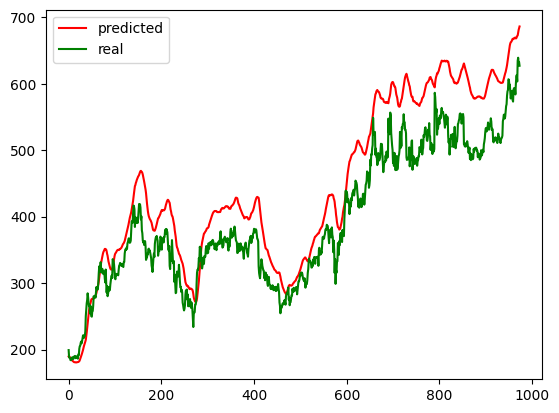

In [12]:
plt.plot(pred.squeeze() , color = "red" , label = "predicted")
plt.plot(real.squeeze() , color = "green" , label = "real")
plt.legend()
plt.show()

Finally, we plot the predicted and real stock prices to visualize how well the model performed. The red line represents the predicted prices, while the green line represents the actual prices.